<a href="https://colab.research.google.com/github/carlosdgerez/machine_learning/blob/main/module4/firstAproach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Use seaborn for pairplot.
!pip install -q seaborn

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

bikes = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
bikes

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered
0,1/1/11,1,0,0,0,1,0.81,0,3.28,3.0014,3,13
1,1/1/11,1,1,0,0,1,0.80,0,2.34,1.9982,8,32
2,1/1/11,1,2,0,0,1,0.80,0,2.34,1.9982,5,27
3,1/1/11,1,3,0,0,1,0.75,0,3.28,3.0014,3,10
4,1/1/11,1,4,0,0,1,0.75,0,3.28,3.0014,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
16632,11/30/12,4,19,0,1,1,0.66,0,7.04,7.0010,18,359
16633,11/30/12,4,20,0,1,1,0.66,0,7.04,7.0010,12,233
16634,11/30/12,4,21,0,1,1,0.75,6,6.10,5.0012,14,169
16635,11/30/12,4,22,0,1,1,0.75,0,6.10,5.9978,18,145


In [3]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16637 entries, 0 to 16636
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dteday        16637 non-null  object 
 1   season        16637 non-null  int64  
 2   hr            16637 non-null  int64  
 3   holiday       16637 non-null  int64  
 4   workingday    16637 non-null  int64  
 5   weathersit    16637 non-null  int64  
 6   hum           16637 non-null  float64
 7   windspeed     16637 non-null  int64  
 8   temp_c        16637 non-null  float64
 9   feels_like_c  16637 non-null  float64
 10  casual        16637 non-null  int64  
 11  registered    16637 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.5+ MB


In [4]:
bikes['dteday'] = pd.to_numeric(bikes.dteday.str.replace('/',''))

In [5]:
bikes['target'] = bikes.casual + bikes.registered
bikes

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,casual,registered,target
0,1111,1,0,0,0,1,0.81,0,3.28,3.0014,3,13,16
1,1111,1,1,0,0,1,0.80,0,2.34,1.9982,8,32,40
2,1111,1,2,0,0,1,0.80,0,2.34,1.9982,5,27,32
3,1111,1,3,0,0,1,0.75,0,3.28,3.0014,3,10,13
4,1111,1,4,0,0,1,0.75,0,3.28,3.0014,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,113012,4,19,0,1,1,0.66,0,7.04,7.0010,18,359,377
16633,113012,4,20,0,1,1,0.66,0,7.04,7.0010,12,233,245
16634,113012,4,21,0,1,1,0.75,6,6.10,5.0012,14,169,183
16635,113012,4,22,0,1,1,0.75,0,6.10,5.9978,18,145,163


In [6]:
bikes.drop(['casual', 'registered'], axis=1, inplace=True)

In [7]:
train_dataset = bikes.sample(frac=0.8, random_state=0)
test_dataset = bikes.drop(train_dataset.index)


In [8]:
test_dataset

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,target
0,1111,1,0,0,0,1,0.81,0,3.28,3.0014,16
13,1111,1,13,0,0,2,0.72,20,13.62,13.9970,94
21,1111,1,21,0,0,2,0.87,13,10.80,11.0006,34
26,1211,1,2,0,0,2,1.00,19,11.74,11.9972,9
27,1211,1,3,0,0,2,0.94,13,13.62,13.9970,6
...,...,...,...,...,...,...,...,...,...,...,...
16606,112912,4,17,0,1,1,0.39,13,7.98,5.9978,561
16610,112912,4,21,0,1,1,0.65,9,4.22,1.9982,208
16614,113012,4,1,0,1,1,0.70,6,3.28,1.0016,19
16623,113012,4,10,0,1,2,0.65,0,6.10,5.9978,169


In [9]:
train_dataset

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c,target
6202,92111,3,0,0,1,1,1.00,0,17.38,18.0032,27
13128,7612,3,5,0,1,1,0.66,13,26.78,30.0020,35
16621,113012,4,8,0,1,2,0.80,6,2.34,1.0016,729
7057,102611,4,16,0,1,2,0.77,6,16.44,17.0000,213
5704,83111,3,3,0,1,1,0.78,0,18.32,18.9998,6
...,...,...,...,...,...,...,...,...,...,...,...
4952,73011,3,6,0,0,1,0.70,20,25.84,28.9988,24
6013,91311,3,3,0,1,1,0.83,0,19.26,20.0030,4
13919,8812,3,4,0,1,1,0.84,0,24.90,28.0022,7
1935,32611,2,10,0,0,1,0.41,11,4.22,1.0016,125


In [11]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
dteday,13310.0,47724.871150,38601.782491,1111.00,10611.0000,41811.50,81912.0000,123111.0000
season,13310.0,2.483471,1.085768,1.00,2.0000,2.00,3.0000,4.0000
hr,13310.0,11.529076,6.907057,0.00,6.0000,12.00,18.0000,23.0000
holiday,13310.0,0.028625,0.166757,0.00,0.0000,0.00,0.0000,1.0000
workingday,13310.0,0.685575,0.464304,0.00,0.0000,1.00,1.0000,1.0000
weathersit,13310.0,1.422615,0.643070,1.00,1.0000,1.00,2.0000,4.0000
hum,13310.0,0.626212,0.193198,0.00,0.4700,0.63,0.7800,1.0000
windspeed,13310.0,12.738317,8.179928,0.00,7.0000,13.00,17.0000,57.0000
temp_c,13310.0,15.706998,9.031127,-7.06,7.9800,16.44,23.0200,38.0600
feels_like_c,13310.0,15.831020,11.309288,-16.00,5.9978,17.00,24.9992,48.9968


In [12]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()


train_labels = train_features.pop('target')
test_labels = test_features.pop('target')


In [13]:
test_features

,dteday,season,hr,holiday,workingday,weathersit,hum,windspeed,temp_c,feels_like_c
0,1111,1,0,0,0,1,0.81,0,3.28,3.0014
13,1111,1,13,0,0,2,0.72,20,13.62,13.9970
21,1111,1,21,0,0,2,0.87,13,10.80,11.0006
26,1211,1,2,0,0,2,1.00,19,11.74,11.9972
27,1211,1,3,0,0,2,0.94,13,13.62,13.9970
...,...,...,...,...,...,...,...,...,...,...
16606,112912,4,17,0,1,1,0.39,13,7.98,5.9978
16610,112912,4,21,0,1,1,0.65,9,4.22,1.9982
16614,113012,4,1,0,1,1,0.70,6,3.28,1.0016
16623,113012,4,10,0,1,2,0.65,0,6.10,5.9978


In [14]:
test_labels

0         16
13        94
21        34
26         9
27         6
        ... 
16606    561
16610    208
16614     19
16623    169
16634    183
Name: target, Length: 3327, dtype: int64

It is good practice to normalize features that use different scales and ranges.

One reason this is important is because the features are multiplied by the model weights. So, the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model *might* converge without feature normalization, normalization makes training much more stable.

Note: There is no advantage to normalizing the one-hot features—it is done here for simplicity. For more details on how to use the preprocessing layers, refer to the [Working with preprocessing layers](https://www.tensorflow.org/guide/keras/preprocessing_layers) guide and the [Classify structured data using Keras preprocessing layers](../structured_data/preprocessing_layers.ipynb) tutorial.

### The Normalization layer

The `tf.keras.layers.Normalization` is a clean and simple way to add feature normalization into your model.

The first step is to create the layer:

In [15]:
normalizer = tf.keras.layers.Normalization(axis=-1)



Create a two-step Keras Sequential model again with the first layer being `normalizer` (`tf.keras.layers.Normalization(axis=-1)`) you defined earlier and adapted to the whole dataset:

In [18]:
normalizer.adapt(np.array(train_features))

In [40]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=100)
])

When you call `Model.predict` on a batch of inputs, it produces `units=1` outputs for each example:

In [41]:
linear_model.predict(train_features[:10])

array([[-0.473,  0.254,  0.227,  0.504, -0.209, -0.608,  0.453,  0.684,
         0.929,  0.309, -0.674,  0.311, -0.787, -0.192,  0.031,  0.162,
        -0.215, -0.279, -0.468,  0.214,  0.208,  0.558, -0.229,  0.283,
        -0.368,  0.467, -0.35 ,  0.077,  0.633,  0.093,  0.098, -0.257,
        -0.181,  0.796,  0.877, -0.352, -0.578,  0.92 ,  0.334,  0.769,
         0.287,  0.002, -0.191, -0.793, -0.707, -0.033, -0.221, -0.329,
        -0.57 , -0.07 ,  0.271, -0.111,  0.373, -0.073,  0.031, -0.766,
         0.534, -0.242, -0.624,  0.866,  0.315,  0.257,  0.35 , -0.126,
        -0.149, -0.783, -0.227, -0.101, -1.098,  0.867, -0.233, -0.186,
        -0.779,  0.89 ,  0.072,  0.61 ,  0.761,  0.303,  0.556, -0.247,
         0.146,  0.368,  0.18 ,  0.051,  0.324, -0.654,  0.005,  0.31 ,
        -0.23 ,  0.702,  0.449, -0.622, -0.185, -0.574,  0.484, -0.335,
         0.424, -0.904, -0.583,  0.787],
       [-0.667,  0.12 ,  0.269, -0.173, -0.114, -0.251, -0.378,  0.327,
        -0.324,  0.168,

Configure the model with Keras `Model.compile` and train with `Model.fit` for 100 epochs:

In [42]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [43]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

CPU times: user 59.5 s, sys: 4.85 s, total: 1min 4s
Wall time: 1min 22s


Visualize the model's training progress using the stats stored in the `history` object:

In [44]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,103.773598,105.885109,95
96,103.770134,105.872169,96
97,103.768677,105.918831,97
98,103.760986,105.894897,98
99,103.765976,105.913795,99


In [45]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([50, 250])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

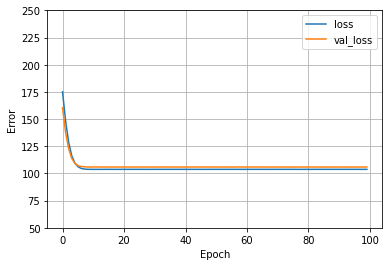

In [46]:
plot_loss(history)

In [47]:
test_results = {}

test_results['bikes_rented'] = linear_model.evaluate(
    test_features,
    test_labels, verbose=0)

In [48]:
test_results

{'bikes_rented': 102.20304870605469}